In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df1 = pd.get_dummies(df['Gender'], drop_first=True)

In [14]:
df1.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [15]:
df2 = pd.get_dummies(df['Geography'], drop_first=True)

In [16]:
df2.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [17]:
df = pd.concat([df2, df1, df], axis=1)

In [18]:
df.head()

,Germany,Spain,Male,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [20]:
df.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.corr()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Germany,1.000000,-0.332084,-0.024628,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488
Spain,-0.332084,1.000000,0.016889,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.052667
Male,-0.024628,0.016889,1.000000,-0.002857,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
CreditScore,0.005538,0.004780,-0.002857,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.046897,-0.001685,-0.027544,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.000567,0.003868,0.014733,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.401110,-0.134892,0.012087,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,-0.010419,0.009039,-0.021859,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.010577,-0.013480,0.005766,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,-0.020486,0.016732,0.022544,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


In [22]:
import seaborn as sns

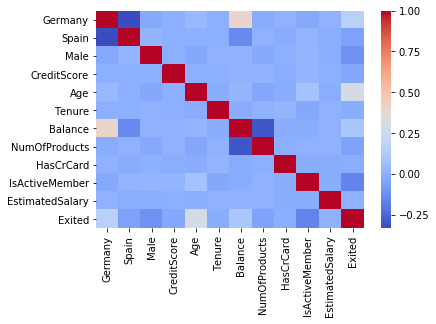

In [27]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [28]:
df.drop('HasCrCard', axis = 1, inplace = True)

In [32]:
df_X2 = df[['Germany', 'Spain', 'Male', 'IsActiveMember']]

In [34]:
df_X2.head(2)

,Germany,Spain,Male,IsActiveMember
0,0,0,0,1
1,0,1,0,1


In [33]:
df_X1 = df.drop(['Germany', 'Spain', 'Male', 'IsActiveMember', 'Exited'], axis = 1)

In [35]:
df_X1.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss = StandardScaler()

In [36]:
scaled_array = ss.fit_transform(df_X1)

In [37]:
scaled_array

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.02188649],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002, -0.91158349,
         0.21653375],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  2.52705662,
         0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, -1.22584767, -0.91158349,
        -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, -0.02260751,  0.80773656,
        -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386,  0.85996499, -0.91158349,
        -1.07636976]])

In [38]:
X = pd.DataFrame(scaled_array, columns=df_X1.columns)

In [39]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


In [40]:
X = pd.concat([X, df_X2], axis=1)

In [41]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Germany,Spain,Male,IsActiveMember
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,0,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,1,0,1


In [42]:
Y = df['Exited']

In [43]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64